In [117]:
import pandas as pd
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.preprocessing import StandardScaler, PowerTransformer, PolynomialFeatures
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score
from math import radians, sin, cos, sqrt, atan2
import requests
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import MarkerCluster


In [118]:
# Load and filter the data
df = pd.read_csv('kc_house_data.csv')
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [119]:
#Convert date of sale to a usable format
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [120]:
# Filter homes with price between 100,000 and 2,000,000
df = df[(df['price'] >= 100000) & (df['price'] <= 1000000)]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,0,1955,0,98178,47.5112,-122.257,1340,5650,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,400,1951,1991,98125,47.7210,-122.319,1690,7639,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,0,1933,0,98028,47.7379,-122.233,2720,8062,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,910,1965,0,98136,47.5208,-122.393,1360,5000,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,0,1987,0,98074,47.6168,-122.045,1800,7503,2015,2


In [121]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month'],
      dtype='object')

In [122]:
df.shape

(20123, 23)

In [123]:
print(df.columns.tolist())

['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15', 'year', 'month']


In [124]:
df.columns = df.columns.str.strip()

In [125]:
df = df.drop(['id', 'waterfront', 'view', 'yr_renovated'], axis=1)
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503,2015,2


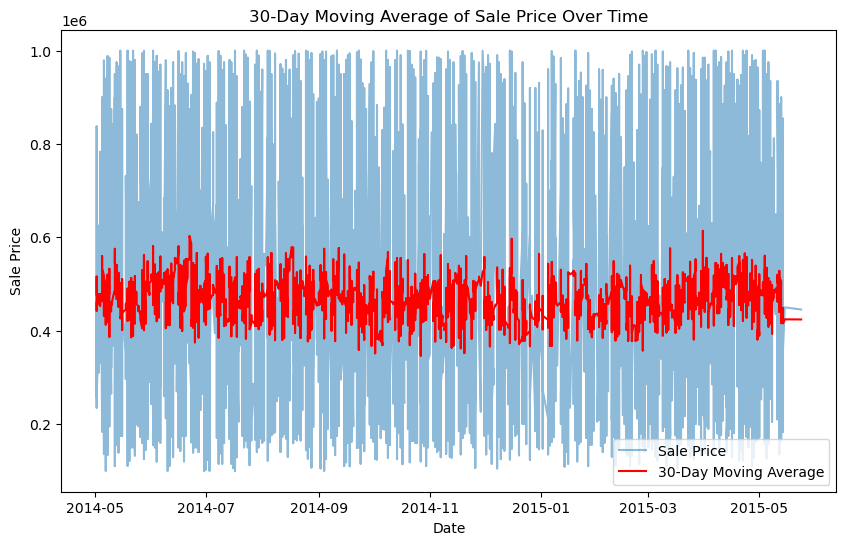

In [126]:
# Sort by date
df = df.sort_values('date')

# Calculate 30-day moving average of sale price
df['30_day_ma'] = df['price'].rolling(window=30, min_periods=1).mean()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['price'], label='Sale Price', alpha=0.5)
plt.plot(df['date'], df['30_day_ma'], label='30-Day Moving Average', color='red')
plt.xlabel('Date')
plt.ylabel('Sale Price')
plt.title('30-Day Moving Average of Sale Price Over Time')
plt.legend()
plt.show()

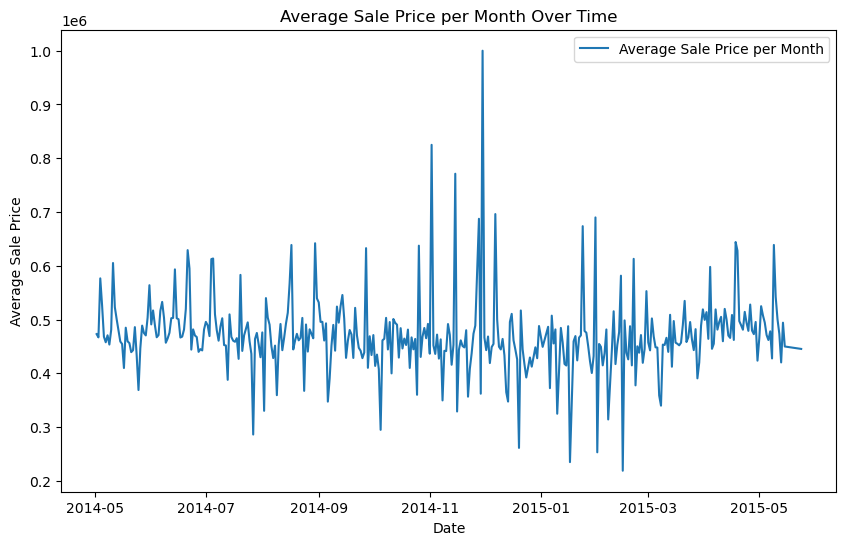

In [127]:
# Group by 'date' and calculate the average sale price for each month
monthly_avg_price = df.groupby('date')['price'].mean().reset_index()

# Plotting the data
plt.figure(figsize=(10, 6))
plt.plot(monthly_avg_price['date'], monthly_avg_price['price'], label='Average Sale Price per Month')
plt.xlabel('Date')
plt.ylabel('Average Sale Price')
plt.title('Average Sale Price per Month Over Time')
plt.legend()
plt.show()

In [128]:
df.tail()


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,30_day_ma
11560,2015-05-14,360000.0,4,2.50,2020,7289,2.0,3,7,2020,0,1994,98031,47.4010,-122.171,2090,7259,2015,5,422293.000000
20472,2015-05-14,479349.0,5,3.00,3223,6371,2.0,3,9,3223,0,2014,98042,47.3584,-122.163,1979,9008,2015,5,429287.966667
928,2015-05-14,359000.0,2,2.75,1370,1140,2.0,3,8,1080,290,2009,98133,47.7052,-122.343,1370,1090,2015,5,415421.300000
5637,2015-05-15,450000.0,5,2.00,1870,7344,1.5,3,7,1870,0,1960,98007,47.5951,-122.144,1870,7650,2015,5,424421.300000
13053,2015-05-24,445500.0,2,1.75,1390,6670,1.0,3,6,720,670,1941,98115,47.6914,-122.308,920,6380,2015,5,424154.633333


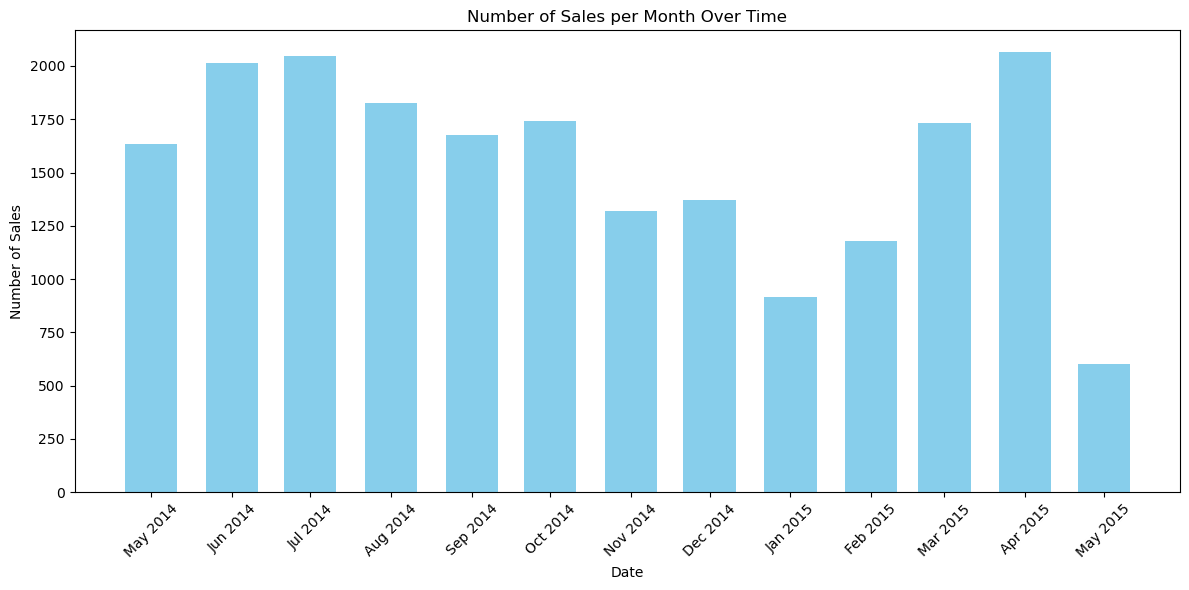

In [129]:
# Group by 'year' and 'month' and count the number of sales per month
monthly_sales = df.groupby(['year', 'month']).size().reset_index(name='sales')

# Create a 'date' column for plotting purposes
monthly_sales['date'] = pd.to_datetime(monthly_sales[['year', 'month']].assign(day=1))

# Convert 'date' to the desired format for x-axis labels
monthly_sales['month_year'] = monthly_sales['date'].dt.strftime('%b %Y')

# Adjusting the bar width
bar_width = 20  # Adjust the bar width as needed

# Plotting the bar chart
plt.figure(figsize=(12, 6))
plt.bar(monthly_sales['date'], monthly_sales['sales'], width=bar_width, color='skyblue')
plt.xlabel('Date')
plt.ylabel('Number of Sales')
plt.title('Number of Sales per Month Over Time')
plt.xticks(monthly_sales['date'], monthly_sales['month_year'], rotation=45)
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [130]:
# Function to calculate distance using the Haversine formula
def haversine(lat1, lon1, lat2, lon2):
    lat1, lon1, lat2, lon2 = map(radians, [lat1, lon1, lat2, lon2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2) ** 2 + cos(lat1) * cos(lat2) * sin(dlon / 2) ** 2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    r = 6371  # Radius of Earth in kilometers
    return r * c

In [131]:
# Calculate distances to key locations
city_center_coords = (47.615257, -122.338356)
MSFT_coords = (47.643543, -122.130821)
Boeing_coords = (47.532733, -122.316916)

df['distance_to_Seattle'] = df.apply(lambda row: haversine(row['lat'], row['long'], *city_center_coords), axis=1)
df['distance_to_MSFT'] = df.apply(lambda row: haversine(row['lat'], row['long'], *MSFT_coords), axis=1)
df['distance_to_Boeing'] = df.apply(lambda row: haversine(row['lat'], row['long'], *Boeing_coords), axis=1)
print("\nDataFrame with distances to key locations:")
print(df[['lat', 'long', 'distance_to_Seattle', 'distance_to_MSFT', 'distance_to_Boeing']].head())


DataFrame with distances to key locations:
           lat     long  distance_to_Seattle  distance_to_MSFT  \
21161  47.4761 -121.734            47.927443         35.117953   
15556  47.5631 -122.397             7.278564         21.869485   
8326   47.5274 -122.384            10.351983         22.963935   
12496  47.6639 -122.364             5.739959         17.611636   
21287  47.5133 -122.110            20.544812         14.566329   

       distance_to_Boeing  
21161           44.236660  
15556            6.894131  
8326             5.071400  
12496           15.006304  
21287           15.686707  


In [132]:
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,...,lat,long,sqft_living15,sqft_lot15,year,month,30_day_ma,distance_to_Seattle,distance_to_MSFT,distance_to_Boeing
21161,2014-05-02,459990.0,3,2.50,2680,5539,2.0,3,8,2680,...,47.4761,-121.734,2990,6037,2014,5,459990.0,47.927443,35.117953,44.236660
15556,2014-05-02,439950.0,3,2.50,1770,2875,2.0,3,8,1770,...,47.5631,-122.397,1770,3833,2014,5,449970.0,7.278564,21.869485,6.894131
8326,2014-05-02,615000.0,3,1.75,2360,7291,1.0,4,8,1360,...,47.5274,-122.384,1860,5499,2014,5,504980.0,10.351983,22.963935,5.071400
12496,2014-05-02,440000.0,2,1.00,800,4850,1.0,4,7,800,...,47.6639,-122.364,1150,4365,2014,5,488735.0,5.739959,17.611636,15.006304
21287,2014-05-02,625000.0,4,3.25,2730,54014,1.0,3,9,1560,...,47.5133,-122.110,2730,111274,2014,5,515988.0,20.544812,14.566329,15.686707


In [133]:
df.columns


Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'condition', 'grade', 'sqft_above', 'sqft_basement',
       'yr_built', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15',
       'year', 'month', '30_day_ma', 'distance_to_Seattle', 'distance_to_MSFT',
       'distance_to_Boeing'],
      dtype='object')

In [134]:
# Define the feature set (X) and the target variable (Y)
X = df.drop(columns=['price', 'date'])  
Y = df['price']

# Perform train-test split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(np.shape(X))
print(np.shape(Y))

(20123, 21)
(20123,)


In [135]:

X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,...,lat,long,sqft_living15,sqft_lot15,year,month,30_day_ma,distance_to_Seattle,distance_to_MSFT,distance_to_Boeing
21161,3,2.50,2680,5539,2.0,3,8,2680,0,2013,...,47.4761,-121.734,2990,6037,2014,5,459990.0,47.927443,35.117953,44.236660
15556,3,2.50,1770,2875,2.0,3,8,1770,0,1990,...,47.5631,-122.397,1770,3833,2014,5,449970.0,7.278564,21.869485,6.894131
8326,3,1.75,2360,7291,1.0,4,8,1360,1000,1948,...,47.5274,-122.384,1860,5499,2014,5,504980.0,10.351983,22.963935,5.071400
12496,2,1.00,800,4850,1.0,4,7,800,0,1944,...,47.6639,-122.364,1150,4365,2014,5,488735.0,5.739959,17.611636,15.006304
21287,4,3.25,2730,54014,1.0,3,9,1560,1170,2007,...,47.5133,-122.110,2730,111274,2014,5,515988.0,20.544812,14.566329,15.686707


In [136]:
Y.head()

21161    459990.0
15556    439950.0
8326     615000.0
12496    440000.0
21287    625000.0
Name: price, dtype: float64

In [137]:
X.dtypes

bedrooms                 int64
bathrooms              float64
sqft_living              int64
sqft_lot                 int64
floors                 float64
condition                int64
grade                    int64
sqft_above               int64
sqft_basement            int64
yr_built                 int64
zipcode                  int64
lat                    float64
long                   float64
sqft_living15            int64
sqft_lot15               int64
year                     int32
month                    int32
30_day_ma              float64
distance_to_Seattle    float64
distance_to_MSFT       float64
distance_to_Boeing     float64
dtype: object

In [138]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = .2, random_state=33)

In [139]:
from xgboost import XGBRegressor
xgb_model = XGBRegressor(random_state = 99)



In [140]:
params = {'objective': 'reg:squarederror',
         'max_depth': 4,
          'alpha': 1,
          'learning_rate': 0.1,
          'n_estimators': 90
         }
# Initialize the XGBoost regressor with the parameters
xgb_reg = XGBRegressor(**params)

# Ensure X_train and Y_train are in the correct format
if isinstance(X_train, pd.DataFrame) and isinstance(Y_train, pd.Series):
    # Train the model
    xgb_reg.fit(X_train, Y_train)
    
    # Make predictions
    predictions = xgb_reg.predict(X_test)
    
    # Display the first 10 predictions
    print(predictions[:10])
else:
    print("X_train should be a DataFrame and Y_train should be a Series.")


[834023.   507418.56 696542.75 448126.12 276078.38 340462.66 671447.94
 497658.1  589226.8  708551.06]


In [141]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Calculate metrics
mae = mean_absolute_error(Y_test, predictions)
mse = mean_squared_error(Y_test, predictions)
rmse = mean_squared_error(Y_test, predictions, squared=False)
r2 = r2_score(Y_test, predictions)

# Display the metrics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 52800.99200698758
Mean Squared Error (MSE): 5498420091.980955
Root Mean Squared Error (RMSE): 74151.3323682114
R-squared (R²): 0.8623323130609297


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


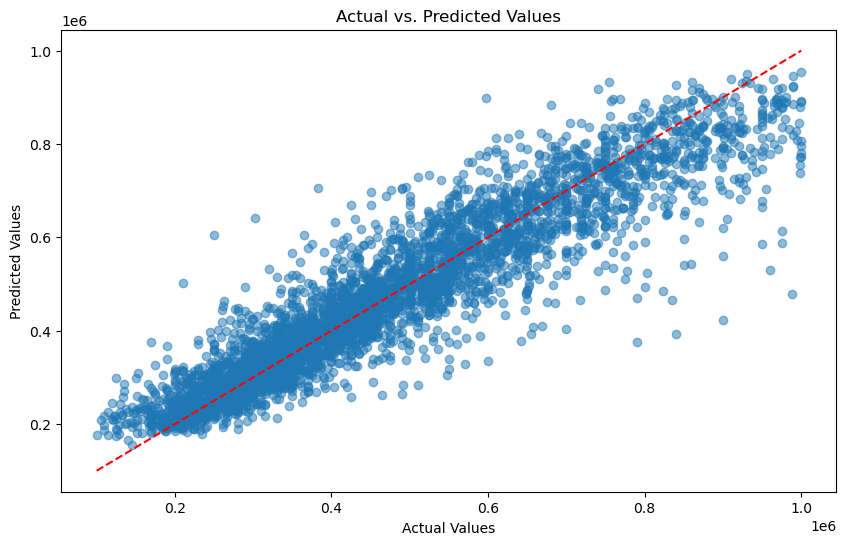

In [142]:
# Create a scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction
plt.show()

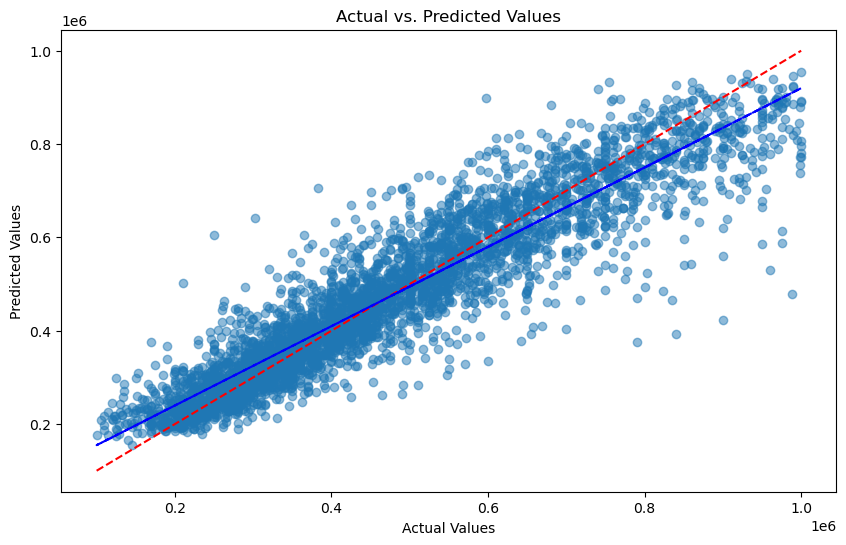

In [143]:
import numpy as np

# Scatter plot of actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(Y_test, predictions, alpha=0.5)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Values')
plt.plot([Y_test.min(), Y_test.max()], [Y_test.min(), Y_test.max()], 'r--')  # Line of perfect prediction

# Add trend line
z = np.polyfit(Y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(Y_test, p(Y_test), "b--")
plt.show()

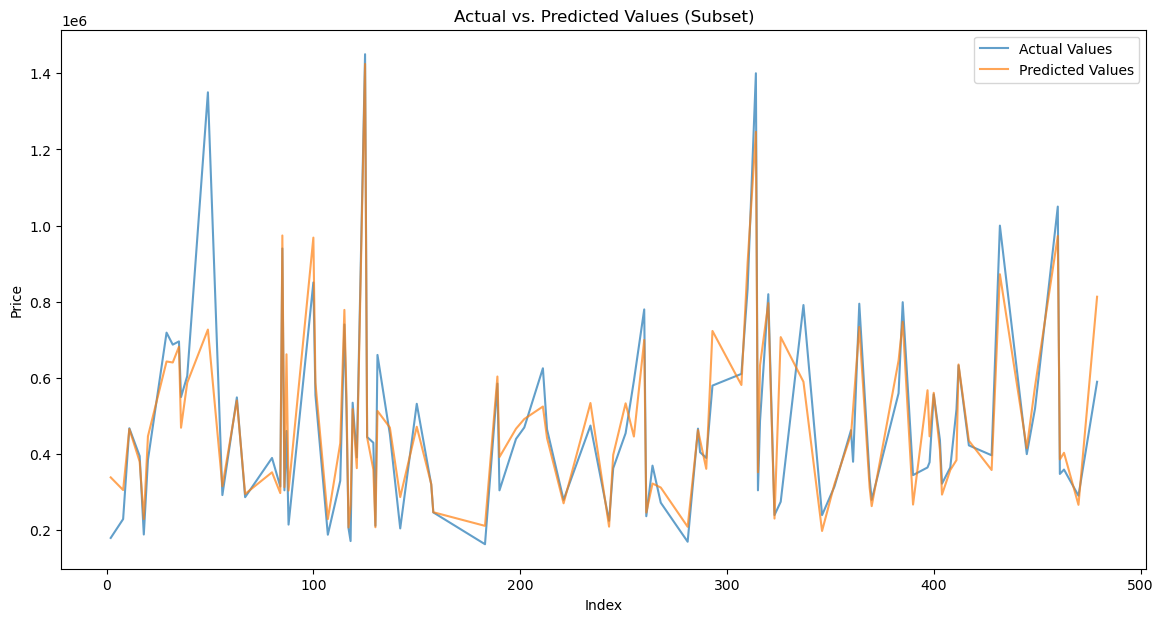

In [144]:
# Plot a subset of the data for better clarity
subset_size = 100  # Adjust this size for clarity
plt.figure(figsize=(14, 7))
plt.plot(sorted_actuals.index[:subset_size], sorted_actuals.values[:subset_size], label='Actual Values', alpha=0.7)
plt.plot(sorted_predictions.index[:subset_size], sorted_predictions.values[:subset_size], label='Predicted Values', alpha=0.7)
plt.xlabel('Index')
plt.ylabel('Price')
plt.title('Actual vs. Predicted Values (Subset)')
plt.legend()
plt.show()

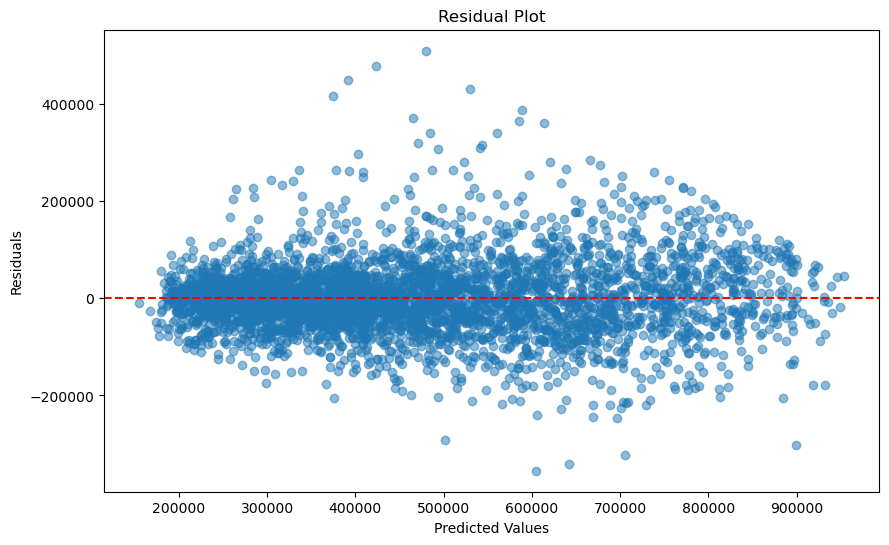

In [145]:
# Calculate residuals
residuals = Y_test - predictions

# Residual plot
plt.figure(figsize=(10, 6))
plt.scatter(predictions, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

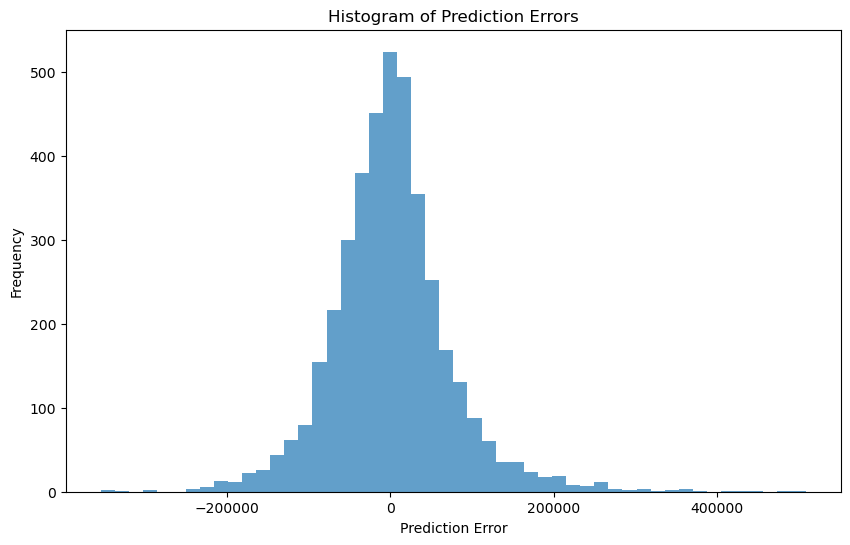

In [146]:
# Histogram of errors
plt.figure(figsize=(10, 6))
plt.hist(residuals, bins=50, alpha=0.7)
plt.xlabel('Prediction Error')
plt.ylabel('Frequency')
plt.title('Histogram of Prediction Errors')
plt.show()

In [147]:
# Create a DataFrame to hold the test data, predictions, and residuals
results = pd.DataFrame({'Actual': Y_test, 'Predicted': predictions, 'Residual': residuals})
results.index = Y_test.index  # Align the index with the original test data

# Find the 100 largest absolute residuals
largest_errors = results['Residual'].abs().nlargest(100)

# Get the rows corresponding to the largest errors
largest_error_rows = df.loc[largest_errors.index]

# Merge with the results DataFrame to include the predicted prices and residuals
merged_largest_error_rows = largest_error_rows.merge(results, left_index=True, right_index=True)

# Display the rows with the largest errors, including actual and predicted prices and residuals
print(merged_largest_error_rows)

            date      price  bedrooms  bathrooms  sqft_living  sqft_lot  \
19971 2014-05-08   988500.0         3       2.75         2015     16807   
1030  2014-10-20   900000.0         4       2.00         1190      8190   
15386 2014-07-15   840500.0         4       2.25         2290     12174   
1662  2015-03-30   960000.0         3       2.50         1730      4102   
1157  2014-12-29   790000.0         4       1.75         2460     10061   
...          ...        ...       ...        ...          ...       ...   
9229  2014-08-05   875000.0         5       2.50         2530      8564   
5689  2015-05-04  1000000.0         4       1.50         2100      4560   
11401 2014-10-14   920000.0         3       1.75         2480      4000   
19073 2014-07-22   760000.0         2       1.00         1410      3600   
16220 2015-03-17   261500.0         3       1.00         1130      3600   

       floors  condition  grade  sqft_above  ...  sqft_lot15  year  month  \
19971     2.0         

In [148]:
# Initialize a map centered around the mean latitude and longitude
m = folium.Map(location=[merged_largest_error_rows['lat'].mean(), merged_largest_error_rows['long'].mean()], zoom_start=10)

# Add points to the map
marker_cluster = MarkerCluster().add_to(m)

for idx, row in merged_largest_error_rows.iterrows():
    folium.Marker(
        location=[row['lat'], row['long']],
        popup=folium.Popup(f"Actual Price: {row['Actual']}<br>Predicted Price: {row['Predicted']}<br>Residual: {row['Residual']}", max_width=300)
    ).add_to(marker_cluster)

# Save the map to an HTML file
m.save('largest_residuals_map.html')

# Display the map
m